In [2]:
from citipy import citipy as cp
import random
import pyowm
import numpy as np
from  urllib import request as urllib_request
import datetime
import json 
import matplotlib.pyplot as plt
from math import ceil as ceiling
import csv
import os
import pandas as pd
import requests as req
from scipy.stats.stats import pearsonr
import time
API="0b96cdf195c71f1105e53f361f7e2b27"
owm = pyowm.OWM(API)
url="http://api.openweathermap.org/data/2.5/weather?q="
units="&units=imperial"

In [3]:
cities = []
 
while len(cities) <= 1500:
    latitude = random.randint(-90.00,90.00)
    longitude = random.randint(-180.00, 180.00)
    city = cp.nearest_city(latitude, longitude)
    if city not in cities:
        cities.append({
            'city code' : city,
            'city': city.city_name,
            'country': city.country_code,
            'latitude': latitude,
            'longitude': longitude,
        })
    else:
        continue
            
print(cities)

[{'city code': <citipy.citipy.City object at 0x00000220F8684518>, 'city': 'kinango', 'country': 'ke', 'latitude': -4, 'longitude': 39}, {'city code': <citipy.citipy.City object at 0x00000220F8A49668>, 'city': 'bluff', 'country': 'nz', 'latitude': -66, 'longitude': 169}, {'city code': <citipy.citipy.City object at 0x00000220F8800390>, 'city': 'kalmunai', 'country': 'lk', 'latitude': 4, 'longitude': 88}, {'city code': <citipy.citipy.City object at 0x00000220F87AC7B8>, 'city': 'nederland', 'country': 'us', 'latitude': 30, 'longitude': -94}, {'city code': <citipy.citipy.City object at 0x00000220F9753D30>, 'city': 'rocha', 'country': 'uy', 'latitude': -45, 'longitude': -46}, {'city code': <citipy.citipy.City object at 0x00000220F79F50B8>, 'city': 'ushuaia', 'country': 'ar', 'latitude': -83, 'longitude': -74}, {'city code': <citipy.citipy.City object at 0x00000220F7A2FF28>, 'city': 'warrnambool', 'country': 'au', 'latitude': -42, 'longitude': 142}, {'city code': <citipy.citipy.City object at

In [4]:
weatherInfo={}
for x in cities:
    city = x['city']
    country = x['country']
    citycode = x['city code']
    latitude = x['latitude']
    longitude = x['longitude']
    cityCountryUnitsAPI=url+city+","+country+units+"&APPID="+API
    call=req.get(cityCountryUnitsAPI).json()
    time.sleep(1)
    for y in call:
        try:
            weatherInfo[city] = {
                'City': city,
                'Country':country,
                'Citycode':citycode,
                'Latitude':latitude,
                'Longitude':longitude,
                'Temperature (F)':call['main']['temp'],
                'Wind (mph)':call['wind']['speed'],
                'Humidity (%)':call['main']['humidity'],
                'Cloudiness (%)':call['clouds']['all'],
            }
        except KeyError:
            continue

In [5]:
weatherInfo

{'acapulco': {'City': 'acapulco',
  'Citycode': <citipy.citipy.City at 0x220f88944a8>,
  'Cloudiness (%)': 40,
  'Country': 'mx',
  'Humidity (%)': 83,
  'Latitude': 7,
  'Longitude': -103,
  'Temperature (F)': 82.4,
  'Wind (mph)': 3.36},
 'acarau': {'City': 'acarau',
  'Citycode': <citipy.citipy.City at 0x220f7af4be0>,
  'Cloudiness (%)': 0,
  'Country': 'br',
  'Humidity (%)': 86,
  'Latitude': 4,
  'Longitude': -40,
  'Temperature (F)': 76.28,
  'Wind (mph)': 14.03},
 'ahipara': {'City': 'ahipara',
  'Citycode': <citipy.citipy.City at 0x220f8a492b0>,
  'Cloudiness (%)': 64,
  'Country': 'nz',
  'Humidity (%)': 100,
  'Latitude': -32,
  'Longitude': 173,
  'Temperature (F)': 51.26,
  'Wind (mph)': 19.73},
 'airai': {'City': 'airai',
  'Citycode': <citipy.citipy.City at 0x220f8d9abe0>,
  'Cloudiness (%)': 20,
  'Country': 'pw',
  'Humidity (%)': 51,
  'Latitude': 7,
  'Longitude': 136,
  'Temperature (F)': 84.2,
  'Wind (mph)': 9.17},
 'aklavik': {'City': 'aklavik',
  'Citycode': <ci

##### Instead of doing an API call from OWM, you can always install their package PYOWM and then do this:

for x in cities:

    city = x['city']
    country = x['country']
    citycode = x['city code']
    latitude = x['latitude']
    longitude = x['longitude']
    observation = owm.weather_at_place(city + ',' + country)
    w=observation.get_weather()
    temp = w.get_temperature()
    wind = w.get_wind()
    humid = w.get_humidity()
    cloud = w.get_clouds()
    weatherInfo[city] = {
        'city': city,
        'country':country,
        'citycode':citycode,
        'latitude':latitude,
        'longitude':longitude,
        'temperature':temp['temp'],
        'wind':wind['speed'],
        'humidity':humid,
        'cloudiness':cloud,
    }

In [6]:
weatherDF=pd.DataFrame.from_records(weatherInfo).T
weatherDF.to_csv("weatherDF.csv")

In [7]:
weatherDF2=weatherDF.drop('Citycode', axis=1).drop('City', axis=1).drop('Country', axis=1).drop('Longitude', axis=1)
weatherDF2

,Cloudiness (%),Humidity (%),Latitude,Temperature (F),Wind (mph)
acapulco,40,83,7,82.4,3.36
acarau,0,86,4,76.28,14.03
ahipara,64,100,-32,51.26,19.73
airai,20,51,7,84.2,9.17
aklavik,90,81,72,46.4,6.93
albany,76,74,-68,71.33,6.87
alekseyevsk,75,93,59,55.4,4.47
alice springs,0,10,-20,77,13.87
alofi,64,88,-19,75.2,4.7
alotau,92,100,-10,74.66,15.48


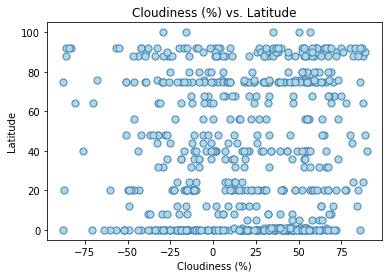

There is an insignificant correlation between Cloudiness (%) and latitude, r=0.059, n=611, p=0.147. Overall, there is a weak and positive correlation between the two variables.

We are unable to reject the null hypotheses.


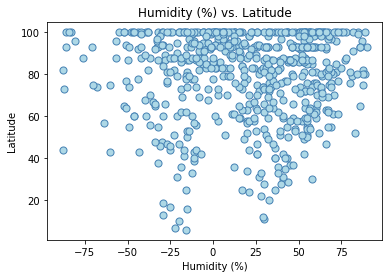

There is an insignificant correlation between Humidity (%) and latitude, r=0.015, n=611, p=0.704. Overall, there is a weak and positive correlation between the two variables.

We are unable to reject the null hypotheses.


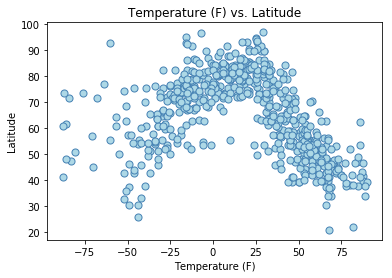

There is a significant correlation between Temperature (F) and latitude, r=-0.333, n=611, p=0.0. Overall, there is a weak and negative correlation between the two variables.

We are able to reject the null hypotheses, and conclude that the higher the latitude, the lower the Temperature (F).


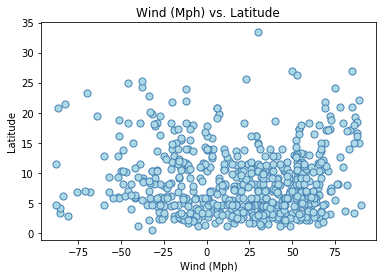

There is an insignificant correlation between Wind (mph) and latitude, r=-0.011, n=611, p=0.785. Overall, there is a weak and negative correlation between the two variables.

We are unable to reject the null hypotheses.


In [16]:
for x in weatherDF2:
    if weatherDF2[x] is not weatherDF2['Latitude']:
        fig=plt.figure()
        plt.scatter(weatherDF2.Latitude, weatherDF2[x], s=50, edgecolor='steelblue', c='lightblue')
        plt.title(f'%s vs. Latitude' % (x.title()))
        plt.ylabel("Latitude")
        plt.xlabel(x.title())
        PR=pearsonr(weatherDF.Latitude, weatherDF2[x])
        plt.savefig(x + "vs. Latitude.png")
        plt.show()
 
        def printanalysis(z,w):
            if z >= 0.5:
                description = "a strong and positive"
                direction = "higher"
            elif 0 < z < 0.5:
                description = "a weak and positive"
                direction = "higher"
            elif -0.5 < z < 0:
                description = "a weak and negative"
                direction = "lower"
            elif z <= 0.5:
                description = "a strong and negative"
                direction = "lower"
            else:
                description = "zero"
            if w > 0.05:
                result="an insignificant"
                null="We are unable to reject the null hypotheses."
            elif w < 0.05:
                result ="a significant"
                null=f"We are able to reject the null hypotheses, and conclude that the higher the latitude, the %s the %s." % (direction, x)
            print(f'There is %s correlation between %s and latitude, r=%s, n=%s, p=%s. Overall, there is %s correlation between the two variables.' % (result, x, round(PR[0],3), len(weatherDF), round(PR[1],3), description))
            print("")
            print(null)
        printanalysis(PR[0],PR[1])

